In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_california_housing,load_iris
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from seedtools import load_seed

## CONTENTS 
- OOB SCORE 
- Feature importance viz 
- Feature importance averaging 
- RandomizedSearchCV

In [2]:
data =  load_seed("heart.csv").data
x =  data.drop(columns=["target"]).values
y =  data["target"].values 
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)

C:\Users\RISHABH\AppData\Roaming\Python\Python311\site-packages\seedtools\seed_file.py:191: UserWarning: SEED FILE IS NOT CONFIGURED YET , CONFIGURE IT USING `register` and `register_version`
  warnings.warn("SEED FILE IS NOT CONFIGURED YET , CONFIGURE IT USING `register` and `register_version`")


### OOB SCORE
(OOB =  out of bag)

In [3]:
rf1 =  RandomForestClassifier(oob_score=True,n_estimators=2)
rf1.fit(x_train,y_train)

score = rf1.score(x_test,y_test)
oob_score = rf1.oob_score_

print("SCORE :",score)
print("OOB SCORE:",oob_score)

SCORE : 0.9560975609756097
OOB SCORE: 0.7609756097560976


C:\Users\RISHABH\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


### feature imp viz

In [4]:
print("Feature importance shape :", rf1.feature_importances_.shape)
rf1.feature_importances_

Feature importance shape : (13,)


array([0.09036339, 0.02956301, 0.24792141, 0.10527909, 0.08969101,
       0.01040488, 0.01147999, 0.10741213, 0.02638972, 0.17003451,
       0.01101222, 0.06627499, 0.03417365])

Text(0.5, 1.0, 'feature importance ')

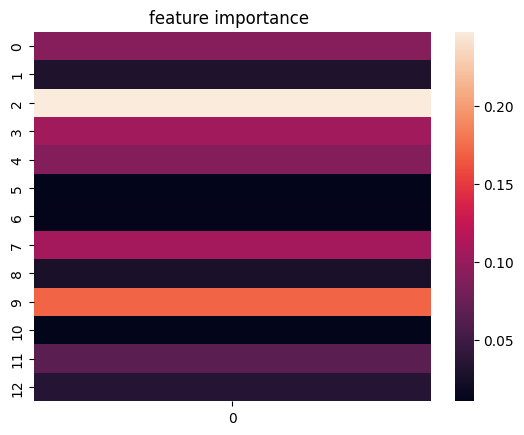

In [5]:
sns.heatmap(rf1.feature_importances_.reshape(13,1))
plt.title("feature importance ")

## feature importance averging 
(how rf average out the dt feature importance)

In [6]:
dt =  DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.feature_importances_

array([0.08705952, 0.04036181, 0.30995578, 0.06511178, 0.07374467,
       0.        , 0.        , 0.05932313, 0.02704143, 0.11093641,
       0.01609664, 0.10557067, 0.10479816])

In [7]:
print("Feature importance of first tree :\n",rf1.estimators_[0].feature_importances_)
print("Feature importance of second tree :\n",rf1.estimators_[1].feature_importances_)

Feature importance of first tree :
 [0.10847986 0.02169202 0.13222135 0.08935194 0.11495638 0.00406853
 0.0053329  0.17753612 0.00726522 0.24795018 0.01778335 0.05862791
 0.01473424]
Feature importance of second tree :
 [0.07224691 0.03743399 0.36362147 0.12120624 0.06442563 0.01674123
 0.01762709 0.03728813 0.04551422 0.09211884 0.00424109 0.07392207
 0.05361307]


In [ ]:
# average first value of first tree and first value of second tree
# 2 => no of tress {n_estimators}  if trees=3 then divide by 3 not 2 
(rf1.estimators_[0].feature_importances_[0] + rf1.estimators_[1].feature_importances_[0]) /2

0.0903633889775762

## Randomized SearchCV
(not better results than gridsearch but fast results and more complex feature selection)

In [14]:
model =  RandomForestClassifier()


param_dict = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [20]:

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dict,
    n_iter=20,
    cv=5, 
    random_state=42,
)
random_search.fit(x_train, y_train)

print("Best Parameters:\n", random_search.best_params_)
print("Test Accuracy:", random_search.best_estimator_.score(x_test, y_test))

Best Parameters:
 {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Test Accuracy: 0.9853658536585366
